In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape

(8693, 14)

In [4]:
test.shape

(4277, 13)

In [5]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [7]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [9]:
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

In [10]:
train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [11]:
test['HomePlanet'].value_counts()

Earth     2263
Europa    1002
Mars       925
Name: HomePlanet, dtype: int64

In [12]:
train['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [13]:
test['CryoSleep'].value_counts()

False    2640
True     1544
Name: CryoSleep, dtype: int64

In [14]:
train['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [15]:
train['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

## Outliers in Age

In [16]:
train['Age'].max()

79.0

In [17]:
train['Age'].min()

0.0

In [18]:
test['Age'].max()

79.0

In [19]:
test['Age'].min()

0.0

In [20]:
train['Age'].describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

In [21]:
percentile25=train['Age'].quantile(0.25)
percentile75=train['Age'].quantile(0.75)

iqr = percentile75-percentile25

upper_limit = percentile75 + (1.5*iqr)
lower_limit = percentile25 - (1.5*iqr)

In [22]:
upper_limit , lower_limit

(66.5, -9.5)

In [23]:
for i in range(1,8692):
    if train['Age'][i] > upper_limit:
        train['Age'][i] = upper_limit
    else :
        if train['Age'][i] <lower_limit:
            train['Age'][i] = lower_limit
        else :
            train['Age'][i]=train['Age'][i]

C:\Users\Mrunmay\AppData\Local\Temp\ipykernel_14652\1083366574.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][i]=train['Age'][i]
C:\Users\Mrunmay\AppData\Local\Temp\ipykernel_14652\1083366574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][i] = upper_limit


<AxesSubplot: >

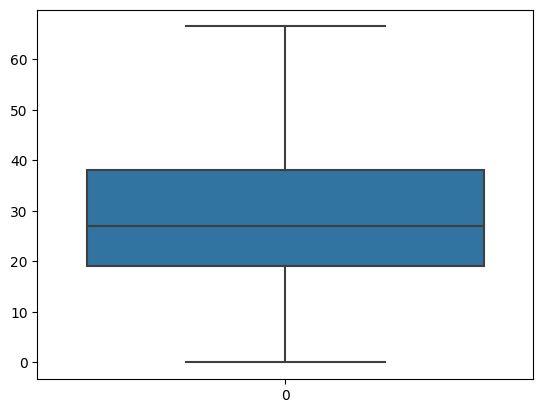

In [24]:
sns.boxplot(train['Age'])

In [25]:
train[train['Age'] > upper_limit]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported


In [26]:
percentile25=test['Age'].quantile(0.25)
percentile75=test['Age'].quantile(0.75)

iqr = percentile75-percentile25

upper_limit = percentile75 + (1.5*iqr)
lower_limit = percentile25 - (1.5*iqr)

In [27]:
for i in range(1,4277):
    if test['Age'][i] > upper_limit:
        test['Age'][i] = upper_limit
    else :
        if test['Age'][i] <lower_limit:
            test['Age'][i] = lower_limit
        else :
            test['Age'][i]=test['Age'][i]

C:\Users\Mrunmay\AppData\Local\Temp\ipykernel_14652\1613378901.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][i]=test['Age'][i]
C:\Users\Mrunmay\AppData\Local\Temp\ipykernel_14652\1613378901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][i] = upper_limit


<AxesSubplot: >

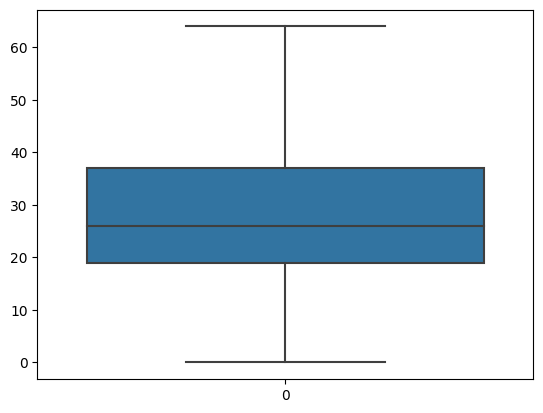

In [28]:
sns.boxplot(test['Age'])

## Filling Missing values 

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [30]:
ct = ColumnTransformer(transformers=[
    ('tnf1',SimpleImputer(strategy='constant',fill_value='Earth'),['HomePlanet']),
    ('tnf2',SimpleImputer(strategy='constant',fill_value='False'),['CryoSleep']),
    ('tnf3',SimpleImputer(strategy='constant',fill_value='TRAPPIST-1e'),['Destination']),
    ('tnf4',SimpleImputer(strategy='mean'),['Age']),
    ('tnf5',SimpleImputer(strategy='constant',fill_value='False'),['VIP']),
    ('tnf6',SimpleImputer(strategy='median'),['RoomService']),
    ('tnf7',SimpleImputer(strategy='median'),['FoodCourt']),
    ('tnf8',SimpleImputer(strategy='median'),['ShoppingMall']),
    ('tnf9',SimpleImputer(strategy='median'),['Spa']),
    ('tnf10',SimpleImputer(strategy='median'),['VRDeck']),
],remainder='passthrough')

In [31]:
ct.set_output(transform='pandas')
train = ct.fit_transform(train)

In [32]:
train.isnull().sum()

tnf1__HomePlanet            0
tnf2__CryoSleep             0
tnf3__Destination           0
tnf4__Age                   0
tnf5__VIP                   0
tnf6__RoomService           0
tnf7__FoodCourt             0
tnf8__ShoppingMall          0
tnf9__Spa                   0
tnf10__VRDeck               0
remainder__PassengerId      0
remainder__Cabin          199
remainder__Transported      0
dtype: int64

In [33]:
test = ct.fit_transform(test)

In [34]:
test.isnull().sum()

tnf1__HomePlanet            0
tnf2__CryoSleep             0
tnf3__Destination           0
tnf4__Age                   0
tnf5__VIP                   0
tnf6__RoomService           0
tnf7__FoodCourt             0
tnf8__ShoppingMall          0
tnf9__Spa                   0
tnf10__VRDeck               0
remainder__PassengerId      0
remainder__Cabin          100
dtype: int64

In [35]:
train.drop('remainder__Cabin',axis=1,inplace=True)
test.drop('remainder__Cabin',axis=1,inplace=True)

## Normalization 

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
ct2 = ColumnTransformer(transformers=[
    ('tnf1',MinMaxScaler(),['tnf6__RoomService']),
    ('tnf2',MinMaxScaler(),['tnf7__FoodCourt']),
    ('tnf3',MinMaxScaler(),['tnf8__ShoppingMall']),
    ('tnf4',MinMaxScaler(),['tnf9__Spa']),
    ('tnf5',MinMaxScaler(),['tnf10__VRDeck'])
],remainder='passthrough')

In [38]:
ct2.set_output(transform='pandas')
train_trf = ct2.fit_transform(train)

In [39]:
train_trf

,tnf1__tnf6__RoomService,tnf2__tnf7__FoodCourt,tnf3__tnf8__ShoppingMall,tnf4__tnf9__Spa,tnf5__tnf10__VRDeck,remainder__tnf1__HomePlanet,remainder__tnf2__CryoSleep,remainder__tnf3__Destination,remainder__tnf4__Age,remainder__tnf5__VIP,remainder__remainder__PassengerId,remainder__remainder__Transported
0,0.000000,0.000000,0.000000,0.000000,0.000000,Europa,False,TRAPPIST-1e,39.0,False,0001_01,False
1,0.007608,0.000302,0.001064,0.024500,0.001823,Earth,False,TRAPPIST-1e,24.0,False,0002_01,True
2,0.003001,0.119948,0.000000,0.299670,0.002030,Europa,False,TRAPPIST-1e,58.0,True,0003_01,False
3,0.000000,0.043035,0.015793,0.148563,0.007997,Europa,False,TRAPPIST-1e,33.0,False,0003_02,False
4,0.021149,0.002348,0.006428,0.025214,0.000083,Earth,False,TRAPPIST-1e,16.0,False,0004_01,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.000000,0.228726,0.000000,0.073322,0.003066,Europa,False,55 Cancri e,41.0,True,9276_01,False
8689,0.000000,0.000000,0.000000,0.000000,0.000000,Earth,True,PSO J318.5-22,18.0,False,9278_01,False
8690,0.000000,0.000000,0.079687,0.000045,0.000000,Earth,False,TRAPPIST-1e,26.0,False,9279_01,True
8691,0.000000,0.035186,0.000000,0.015753,0.134049,Europa,False,55 Cancri e,32.0,False,9280_01,False


In [40]:
test_trf = ct2.fit_transform(test)

## Label Encoding 

In [41]:
test_trf.replace({'False': 0, 'True': 1}, inplace=True)
train_trf.replace({'False': 0, 'True': 1}, inplace=True)

In [42]:
train_trf.head()

,tnf1__tnf6__RoomService,tnf2__tnf7__FoodCourt,tnf3__tnf8__ShoppingMall,tnf4__tnf9__Spa,tnf5__tnf10__VRDeck,remainder__tnf1__HomePlanet,remainder__tnf2__CryoSleep,remainder__tnf3__Destination,remainder__tnf4__Age,remainder__tnf5__VIP,remainder__remainder__PassengerId,remainder__remainder__Transported
0,0.000000,0.000000,0.000000,0.000000,0.000000,Europa,False,TRAPPIST-1e,39.0,False,0001_01,False
1,0.007608,0.000302,0.001064,0.024500,0.001823,Earth,False,TRAPPIST-1e,24.0,False,0002_01,True
2,0.003001,0.119948,0.000000,0.299670,0.002030,Europa,False,TRAPPIST-1e,58.0,True,0003_01,False
3,0.000000,0.043035,0.015793,0.148563,0.007997,Europa,False,TRAPPIST-1e,33.0,False,0003_02,False
4,0.021149,0.002348,0.006428,0.025214,0.000083,Earth,False,TRAPPIST-1e,16.0,False,0004_01,True


In [43]:
train_trf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   tnf1__tnf6__RoomService            8693 non-null   float64
 1   tnf2__tnf7__FoodCourt              8693 non-null   float64
 2   tnf3__tnf8__ShoppingMall           8693 non-null   float64
 3   tnf4__tnf9__Spa                    8693 non-null   float64
 4   tnf5__tnf10__VRDeck                8693 non-null   float64
 5   remainder__tnf1__HomePlanet        8693 non-null   object 
 6   remainder__tnf2__CryoSleep         8693 non-null   object 
 7   remainder__tnf3__Destination       8693 non-null   object 
 8   remainder__tnf4__Age               8693 non-null   float64
 9   remainder__tnf5__VIP               8693 non-null   object 
 10  remainder__remainder__PassengerId  8693 non-null   object 
 11  remainder__remainder__Transported  8693 non-null   bool 

In [44]:
from sklearn.preprocessing import OneHotEncoder

In [45]:
ct3 = ColumnTransformer(transformers=[
    ('t1',OneHotEncoder(sparse_output=False,drop='first'),['remainder__tnf1__HomePlanet']),
    ('t2',OneHotEncoder(sparse_output=False,drop='first'),['remainder__tnf3__Destination'])
],remainder='passthrough')

In [46]:
ct3.set_output(transform='pandas')
train_trf = ct3.fit_transform(train_trf)
test_trf = ct3.fit_transform(test_trf)

In [47]:
train_trf.head()

,t1__remainder__tnf1__HomePlanet_Europa,t1__remainder__tnf1__HomePlanet_Mars,t2__remainder__tnf3__Destination_PSO J318.5-22,t2__remainder__tnf3__Destination_TRAPPIST-1e,remainder__tnf1__tnf6__RoomService,remainder__tnf2__tnf7__FoodCourt,remainder__tnf3__tnf8__ShoppingMall,remainder__tnf4__tnf9__Spa,remainder__tnf5__tnf10__VRDeck,remainder__remainder__tnf2__CryoSleep,remainder__remainder__tnf4__Age,remainder__remainder__tnf5__VIP,remainder__remainder__remainder__PassengerId,remainder__remainder__remainder__Transported
0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,False,39.0,False,0001_01,False
1,0.0,0.0,0.0,1.0,0.007608,0.000302,0.001064,0.024500,0.001823,False,24.0,False,0002_01,True
2,1.0,0.0,0.0,1.0,0.003001,0.119948,0.000000,0.299670,0.002030,False,58.0,True,0003_01,False
3,1.0,0.0,0.0,1.0,0.000000,0.043035,0.015793,0.148563,0.007997,False,33.0,False,0003_02,False
4,0.0,0.0,0.0,1.0,0.021149,0.002348,0.006428,0.025214,0.000083,False,16.0,False,0004_01,True


In [48]:
train_trf.drop('remainder__remainder__remainder__PassengerId',axis=1,inplace=True)

In [49]:
PassengerId = test_trf['remainder__remainder__remainder__PassengerId'].values

In [50]:
test_trf.drop('remainder__remainder__remainder__PassengerId',axis=1,inplace=True)

In [51]:
train_trf.shape

(8693, 13)

In [52]:
test_trf.shape

(4277, 12)

In [53]:
train_trf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   t1__remainder__tnf1__HomePlanet_Europa          8693 non-null   float64
 1   t1__remainder__tnf1__HomePlanet_Mars            8693 non-null   float64
 2   t2__remainder__tnf3__Destination_PSO J318.5-22  8693 non-null   float64
 3   t2__remainder__tnf3__Destination_TRAPPIST-1e    8693 non-null   float64
 4   remainder__tnf1__tnf6__RoomService              8693 non-null   float64
 5   remainder__tnf2__tnf7__FoodCourt                8693 non-null   float64
 6   remainder__tnf3__tnf8__ShoppingMall             8693 non-null   float64
 7   remainder__tnf4__tnf9__Spa                      8693 non-null   float64
 8   remainder__tnf5__tnf10__VRDeck                  8693 non-null   float64
 9   remainder__remainder__tnf2__CryoSleep    

In [54]:
train_trf.rename(columns={'t1__remainder__tnf1__HomePlanet_Europa':'HomePlanet_Europa',
                         't1__remainder__tnf1__HomePlanet_Mars':'HomePlanet_Mars',
                         't2__remainder__tnf3__Destination_PSO J318.5-22':'Destination_PSO J318.5-22',
                         't2__remainder__tnf3__Destination_TRAPPIST-1e':'Destination_TRAPPIST-1e',
                         'remainder__tnf1__tnf6__RoomService':'RoomService',
                         'remainder__tnf2__tnf7__FoodCourt':'FoodCourt',
                         'remainder__tnf3__tnf8__ShoppingMall':'ShoppingMall',
                         'remainder__tnf4__tnf9__Spa':'Spa',
                         'remainder__tnf5__tnf10__VRDeck':'VRDeck',
                         'remainder__remainder__tnf2__CryoSleep':'CryoSleep',
                         'remainder__remainder__tnf4__Age':'Age',
                         'remainder__remainder__tnf5__VIP':'VIP',
                         'remainder__remainder__remainder__Transported':'Transported'},inplace=True)

In [55]:
train_trf.head()

,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,Age,VIP,Transported
0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,False,39.0,False,False
1,0.0,0.0,0.0,1.0,0.007608,0.000302,0.001064,0.024500,0.001823,False,24.0,False,True
2,1.0,0.0,0.0,1.0,0.003001,0.119948,0.000000,0.299670,0.002030,False,58.0,True,False
3,1.0,0.0,0.0,1.0,0.000000,0.043035,0.015793,0.148563,0.007997,False,33.0,False,False
4,0.0,0.0,0.0,1.0,0.021149,0.002348,0.006428,0.025214,0.000083,False,16.0,False,True


In [56]:
test_trf.rename(columns={'t1__remainder__tnf1__HomePlanet_Europa':'HomePlanet_Europa',
                         't1__remainder__tnf1__HomePlanet_Mars':'HomePlanet_Mars',
                         't2__remainder__tnf3__Destination_PSO J318.5-22':'Destination_PSO J318.5-22',
                         't2__remainder__tnf3__Destination_TRAPPIST-1e':'Destination_TRAPPIST-1e',
                         'remainder__tnf1__tnf6__RoomService':'RoomService',
                         'remainder__tnf2__tnf7__FoodCourt':'FoodCourt',
                         'remainder__tnf3__tnf8__ShoppingMall':'ShoppingMall',
                         'remainder__tnf4__tnf9__Spa':'Spa',
                         'remainder__tnf5__tnf10__VRDeck':'VRDeck',
                         'remainder__remainder__tnf2__CryoSleep':'CryoSleep',
                         'remainder__remainder__tnf4__Age':'Age',
                         'remainder__remainder__tnf5__VIP':'VIP'},inplace=True)

In [57]:
test_trf.head()

,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,Age,VIP
0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.00000,0.000000,0.000000,True,27.0,False
1,0.0,0.0,0.0,1.0,0.000000,0.000356,0.00000,0.142260,0.000000,False,19.0,False
2,1.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,True,31.0,False
3,1.0,0.0,0.0,1.0,0.000000,0.263206,0.00000,0.009121,0.026266,False,38.0,False
4,0.0,0.0,0.0,1.0,0.000865,0.000000,0.07658,0.000000,0.000000,False,20.0,False


## Modeling

In [58]:
x = train_trf.drop('Transported',axis=1).values
y = train_trf['Transported'].values

In [59]:
x.shape , y.shape

((8693, 12), (8693,))

In [60]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier , ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier , VotingClassifier ,StackingClassifier , AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

### Logistic Regression

In [62]:
lor = LogisticRegression()
lor.fit(x_train,y_train)
y_pred = lor.predict(x_test)
accuracy_score(y_pred,y_test)

E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7607820586543991

### DT & ET

In [63]:
dt = DecisionTreeClassifier(max_depth=8)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
accuracy_score(y_pred,y_test)

0.7722829212190915

In [64]:
et = ExtraTreeClassifier(max_depth=10)
et.fit(x_train,y_train)
y_pred = et.predict(x_test)
accuracy_score(y_pred,y_test)

0.7395054629097182

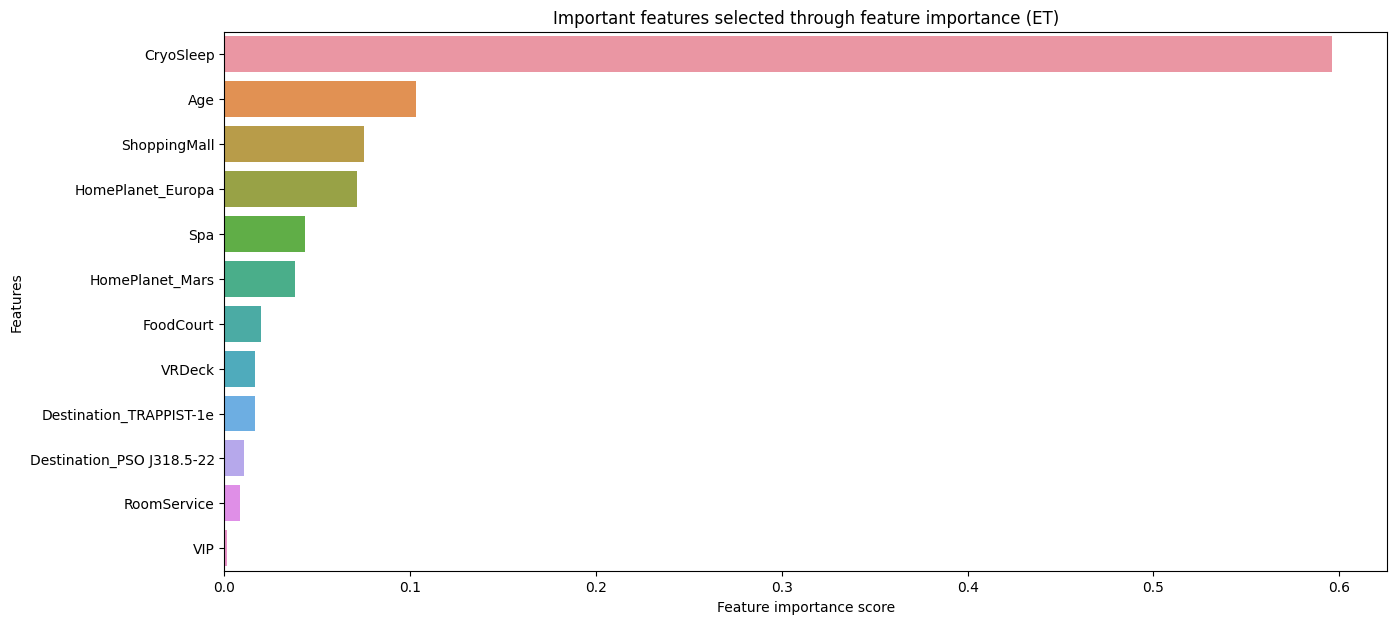

In [65]:
feature_imp = pd.Series(et.feature_importances_, index=test_trf.columns).sort_values(ascending=False)
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.barplot(x=feature_imp, y=feature_imp.index)
ax.set_title("Important features selected through feature importance (ET)")
ax.set_yticklabels(feature_imp.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

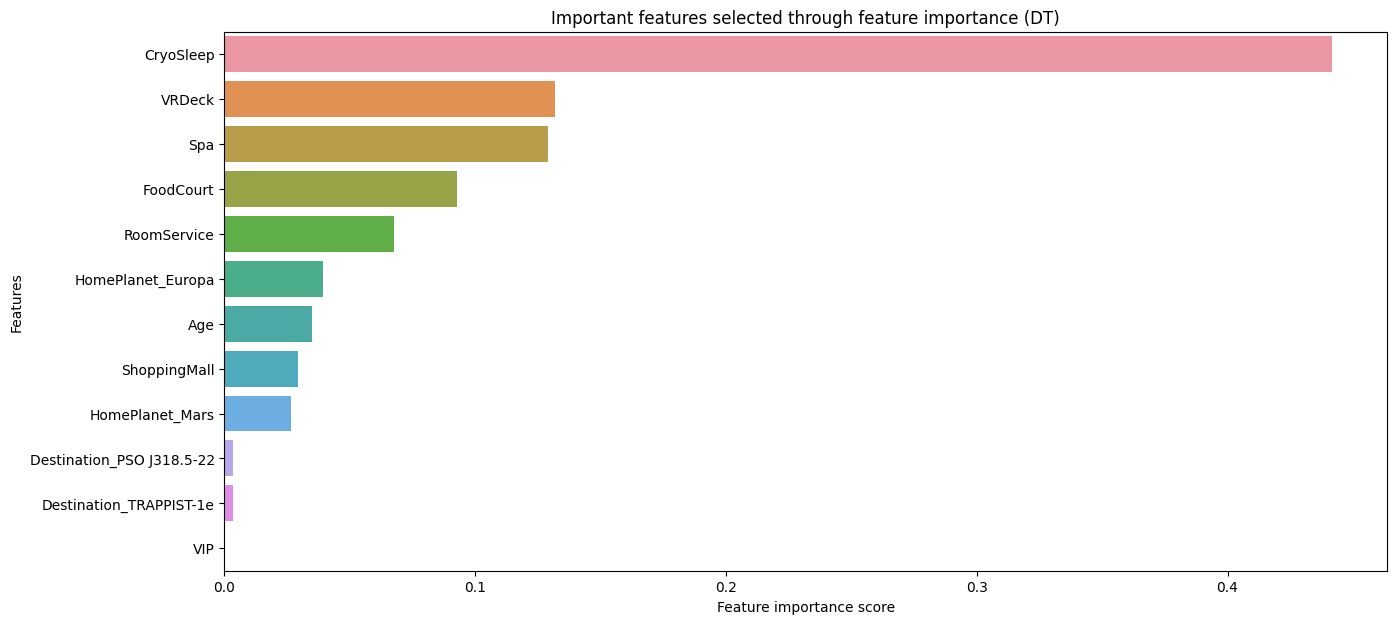

In [66]:
feature_imp = pd.Series(dt.feature_importances_, index=test_trf.columns).sort_values(ascending=False)
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.barplot(x=feature_imp, y=feature_imp.index)
ax.set_title("Important features selected through feature importance (DT)")
ax.set_yticklabels(feature_imp.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

### knn

In [67]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_pred,y_test)

0.7170787809085681

### SVC 

In [68]:
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
accuracy_score(y_pred,y_test)

0.7452558941920644

### RF & ADB

In [69]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_pred,y_test)

0.777458309373203

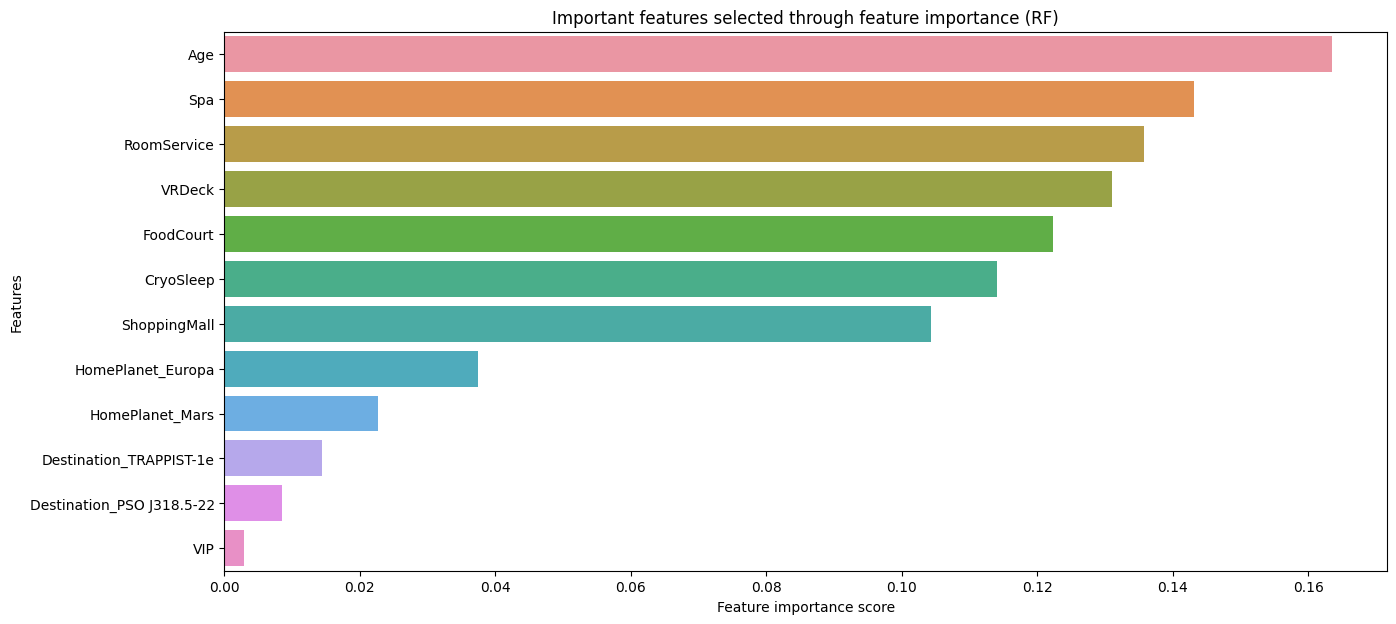

In [70]:
feature_imp = pd.Series(rf.feature_importances_, index=test_trf.columns).sort_values(ascending=False)
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.barplot(x=feature_imp, y=feature_imp.index)
ax.set_title("Important features selected through feature importance (RF)")
ax.set_yticklabels(feature_imp.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [71]:
adb = AdaBoostClassifier()
adb.fit(x_train,y_train)
y_pred = adb.predict(x_test)
accuracy_score(y_pred,y_test)

0.7751581368602645

### NB

In [72]:
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)
accuracy_score(y_pred,y_test)

0.7004025301897643

### kmean

In [73]:
km = KMeans(max_iter=500,n_init=15)
km.fit(x_train,y_train)
y_pred = km.predict(x_test)
accuracy_score(y_pred,y_test)

0.1725129384703853

### XGB

In [78]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
accuracy_score(y_pred,y_test)

0.7705577918343876

### Feature imp

In [74]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(lor, random_state=1).fit(x_train, y_train)
eli5.show_weights(perm, feature_names = test_trf.columns.tolist())

Weight,Feature
0.1448 ± 0.0091,CryoSleep
0.0546 ± 0.0070,HomePlanet_Europa
0.0331 ± 0.0029,Spa
0.0276 ± 0.0026,VRDeck
0.0114 ± 0.0027,RoomService
0.0087 ± 0.0018,Age
0.0078 ± 0.0021,HomePlanet_Mars
0.0060 ± 0.0026,FoodCourt
0.0041 ± 0.0011,ShoppingMall
0.0010 ± 0.0009,Destination_PSO J318.5-22


In [76]:
perm = PermutationImportance(adb, random_state=1).fit(x_train, y_train)
eli5.show_weights(perm, feature_names = test_trf.columns.tolist())

Weight,Feature
0.0659 ± 0.0047,Spa
0.0628 ± 0.0094,RoomService
0.0546 ± 0.0037,VRDeck
0.0444 ± 0.0047,HomePlanet_Europa
0.0383 ± 0.0018,CryoSleep
0.0197 ± 0.0052,FoodCourt
0.0123 ± 0.0016,ShoppingMall
0.0035 ± 0.0021,HomePlanet_Mars
0.0034 ± 0.0018,Age
0.0028 ± 0.0019,Destination_TRAPPIST-1e


In [79]:
perm = PermutationImportance(xgb, random_state=1).fit(x_train, y_train)
eli5.show_weights(perm, feature_names = test_trf.columns.tolist())

Weight,Feature
0.1239 ± 0.0077,CryoSleep
0.0805 ± 0.0052,Spa
0.0693 ± 0.0025,FoodCourt
0.0691 ± 0.0073,VRDeck
0.0519 ± 0.0044,RoomService
0.0467 ± 0.0020,Age
0.0449 ± 0.0017,ShoppingMall
0.0214 ± 0.0022,HomePlanet_Europa
0.0098 ± 0.0021,Destination_TRAPPIST-1e
0.0098 ± 0.0018,HomePlanet_Mars


DROPING DESTINATION AND VIP ,COLUMN , Homeplanet_marse

In [80]:
train_trf.drop(columns=['VIP','Destination_TRAPPIST-1e','HomePlanet_Mars','Destination_PSO J318.5-22'],inplace=True)

In [81]:
test_trf.drop(columns=['VIP','Destination_TRAPPIST-1e','HomePlanet_Mars','Destination_PSO J318.5-22'],inplace=True)

### GRidserchCV

In [82]:
x = train_trf.drop('Transported',axis=1).values
y = train_trf['Transported'].values

In [83]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
params = {'n_jobs':[-1],'verbose':[2],'min_samples_split':[3,4,5],'max_leaf_nodes':[10,15,20,25],'n_estimators':[500,1000,2000,1500],'max_samples':[0.5,0.75]}
grid = GridSearchCV(rf,params)
grid.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   13.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | ela

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    3.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    4.7s finis

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0

[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    2.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    0.4s finished
[Parallel(n_

[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    3.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers

[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 493 out of 500 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 493 out of 500 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done

[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1952 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    4.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]:

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks     

[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    3.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    0.5s finished
[Parallel(n_

[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    4.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]:

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 493 out of 500 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 

[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    3.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: 

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0

[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    3.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    0.4s finished
[Parallel(n_

[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    4.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:    0.5s finished
[Parallel(n

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | e

[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    3.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent worker

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1967 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    4.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks   

[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 493 out of 500 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Using backen

[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    4.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:    0.7s finished
[Parallel(n

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks     

[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    3.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    0.4s finished
[Parallel(n_

[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    4.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers

[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks  

[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1952 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    4.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]:

[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    

[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    3.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent worker

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1952 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    5.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Paral

[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s f

[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    4.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: D

[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    

[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    3.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  

[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    4.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: 

[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 493 out of 500 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    3.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks     

[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    3.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.

[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    4.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:    0.6s finished
[Parallel(n

[Parallel(n_jobs=-1)]: Done 493 out of 500 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 |

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    3.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    3.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 

building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.4s


building tree 217 of 500building tree 218 of 500

building tree 219 of 500
building tree 220 of 500
building tree 221 of 500
building tree 222 of 500
building tree 223 of 500
building tree 224 of 500
building tree 225 of 500
building tree 226 of 500
building tree 227 of 500
building tree 228 of 500
building tree 229 of 500
building tree 230 of 500
building tree 231 of 500
building tree 232 of 500
building tree 233 of 500
building tree 234 of 500
building tree 235 of 500
building tree 236 of 500
building tree 237 of 500
building tree 238 of 500
building tree 239 of 500
building tree 240 of 500
building tree 241 of 500
building tree 242 of 500
building tree 243 of 500
building tree 244 of 500
building tree 245 of 500
building tree 246 of 500
building tree 247 of 500
building tree 248 of 500
building tree 249 of 500
building tree 250 of 500
building tree 251 of 500
building tree 252 of 500
building tree 253 of 500
building tree 254 of 500
building tree 255 of 500
building tree 256 of 500


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    1.0s


building tree 421 of 500
building tree 422 of 500
building tree 423 of 500
building tree 424 of 500
building tree 425 of 500
building tree 426 of 500
building tree 427 of 500
building tree 428 of 500
building tree 429 of 500
building tree 430 of 500
building tree 431 of 500
building tree 432 of 500
building tree 433 of 500
building tree 434 of 500
building tree 435 of 500
building tree 436 of 500
building tree 437 of 500
building tree 438 of 500
building tree 439 of 500
building tree 440 of 500
building tree 441 of 500
building tree 442 of 500
building tree 443 of 500
building tree 444 of 500
building tree 445 of 500
building tree 446 of 500
building tree 447 of 500
building tree 448 of 500
building tree 449 of 500
building tree 450 of 500
building tree 451 of 500
building tree 452 of 500
building tree 453 of 500
building tree 454 of 500
building tree 455 of 500
building tree 456 of 500
building tree 457 of 500
building tree 458 of 500
building tree 459 of 500
building tree 460 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_leaf_nodes': [10, 15, 20, 25],
                         'max_samples': [0.5, 0.75],
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [500, 1000, 2000, 1500],
                         'n_jobs': [-1], 'verbose': [2]})

In [86]:
grid.best_estimator_

RandomForestClassifier(max_leaf_nodes=25, max_samples=0.75, min_samples_split=4,
                       n_estimators=500, n_jobs=-1, verbose=2)

In [87]:
rf = RandomForestClassifier(max_leaf_nodes=25, max_samples=0.75, min_samples_split=4, ###79.6
                       n_estimators=500, n_jobs=-1, verbose=2)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_pred , y_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s


building tree 1 of 500building tree 2 of 500

building tree 4 of 500
building tree 3 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.4s


building tree 193 of 500
building tree 194 of 500
building tree 195 of 500
building tree 196 of 500
building tree 197 of 500
building tree 198 of 500
building tree 199 of 500
building tree 200 of 500
building tree 201 of 500
building tree 202 of 500
building tree 203 of 500
building tree 204 of 500
building tree 205 of 500
building tree 206 of 500
building tree 207 of 500
building tree 208 of 500
building tree 209 of 500
building tree 210 of 500
building tree 211 of 500
building tree 212 of 500
building tree 213 of 500
building tree 214 of 500
building tree 215 of 500
building tree 216 of 500
building tree 217 of 500
building tree 218 of 500
building tree 219 of 500
building tree 220 of 500
building tree 221 of 500
building tree 222 of 500
building tree 223 of 500
building tree 224 of 500
building tree 225 of 500
building tree 226 of 500
building tree 227 of 500
building tree 228 of 500
building tree 229 of 500
building tree 230 of 500
building tree 231 of 500
building tree 232 of 500


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    1.1s


building tree 385 of 500building tree 386 of 500

building tree 387 of 500
building tree 388 of 500
building tree 389 of 500
building tree 390 of 500
building tree 391 of 500
building tree 392 of 500
building tree 393 of 500
building tree 394 of 500
building tree 395 of 500
building tree 396 of 500
building tree 397 of 500
building tree 398 of 500
building tree 399 of 500
building tree 400 of 500
building tree 401 of 500
building tree 402 of 500
building tree 403 of 500
building tree 404 of 500
building tree 405 of 500
building tree 406 of 500
building tree 407 of 500
building tree 408 of 500
building tree 409 of 500
building tree 411 of 500
building tree 410 of 500
building tree 412 of 500
building tree 413 of 500
building tree 414 of 500
building tree 415 of 500
building tree 416 of 500
building tree 417 of 500
building tree 418 of 500
building tree 419 of 500
building tree 420 of 500
building tree 421 of 500
building tree 422 of 500
building tree 423 of 500
building tree 424 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished


0.780333525014376

In [88]:
dtc1 = DecisionTreeClassifier(max_depth=1)
dtc5 = DecisionTreeClassifier(max_depth=5)
dtc10 = DecisionTreeClassifier(max_depth=10)
params = {'n_estimators':[100,200,500,1000,2000],'learning_rate':[0.5,1,1.5],'algorithm':['SAMME','SAMME.R'],'base_estimator':[dtc1,dtc5,dtc10]}

In [89]:
grid1 = GridSearchCV(adb , params,n_jobs=-1)
grid1.fit(x_train , y_train)

E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'base_estimator': [DecisionTreeClassifier(max_depth=1),
                                            DecisionTreeClassifier(max_depth=5),
                                            DecisionTreeClassifier(max_depth=10)],
                         'learning_rate': [0.5, 1, 1.5],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [90]:
grid1.best_estimator_

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1.5, n_estimators=200)

In [93]:
adb = AdaBoostClassifier(algorithm='SAMME',base_estimator=DecisionTreeClassifier(max_depth=1),learning_rate=1.5,n_estimators=200)
adb.fit(x_train,y_train)
y_pred = adb.predict(x_test)
accuracy_score(y_pred,y_test)

E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.7837837837837838

In [94]:
params = {'max_depth':[5,10,15,8],'min_samples_split':[2,4,6],'max_features':['None','sqrt','auto']}
grid2 = GridSearchCV(dt,params,n_jobs=-1,verbose=2)
grid2.fit(x_train , y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda\lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "E:\anaconda\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "E:\anaconda\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  Fi

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=8), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 8],
                         'max_features': ['None', 'sqrt', 'auto'],
                         'min_samples_split': [2, 4, 6]},
             verbose=2)

In [95]:
grid2.best_estimator_

DecisionTreeClassifier(max_depth=10, max_features='sqrt', min_samples_split=6)

In [98]:
dt = DecisionTreeClassifier(max_depth=10,max_features='sqrt',min_samples_split=6)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
accuracy_score(y_pred , y_test)

0.7590569292696953

In [113]:
vclf = VotingClassifier(estimators=[
    ('lor',lor),('grid1',adb),('grid2',dt),('grid',rf),('gb',gb)
],voting='hard')

In [114]:
vclf.fit(x_train,y_train)
y_pred = vclf.predict(x_test)
accuracy_score(y_pred,y_test)

E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   21.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished


0.7906843013225991

## Final 

In [115]:
xf = test_trf.iloc[:,:].values

In [116]:
y_final = vclf.predict(xf)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.2s finished


In [117]:
final = pd.DataFrame()

In [118]:
final['PassengerId'] = PassengerId
final['Transported'] = y_final

In [119]:
final.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [120]:
final.shape

(4277, 2)

In [121]:
y_final

array([ True, False,  True, ...,  True,  True,  True])

In [122]:
final.to_csv('submission2.csv',index=False)

In [111]:
from sklearn.ensemble import GradientBoostingClassifier

In [112]:
gb  =GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
accuracy_score(y_pred,y_test)

0.7791834387579069